# 1. F1 Prediction Project - Exploratory Data Analysis

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [69]:
race_predictor_df = pd.read_csv('/content/V2 Dataset.csv')

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# # Show rows and columns count
print(f"Rows count: {race_predictor_df.shape[0]}\nColumns count: {race_predictor_df.shape[1]}")

Rows count: 23777
Columns count: 27


In [72]:
race_predictor_df.head()

,resultId,raceId,year,race,country_of_race,nationality_of_circuit,driverId,number,driver_name,F2_champion,...,points_in_previous_race,laps,laps_completed_in_previous_races,time,milliseconds,fastestLap,fastest_lap_from_last_race,average_time_lost_in_pits,statusId,status_finished_last_race
0,1,18,2008,Australian Grand Prix,Australia,British,1,22.0,Lewis,NaN,...,NaN,58,NaN,34:50.6,5690616.0,39.0,NaN,NaN,1,NaN
1,2,18,2008,Australian Grand Prix,Australia,German,2,3.0,Nick,NaN,...,NaN,58,NaN,5.478,5696094.0,41.0,NaN,NaN,1,NaN
2,3,18,2008,Australian Grand Prix,Australia,German,3,7.0,Nico,NaN,...,NaN,58,NaN,8.163,5698779.0,41.0,NaN,NaN,1,NaN
3,4,18,2008,Australian Grand Prix,Australia,Spanish,4,5.0,Fernando,NaN,...,NaN,58,NaN,17.181,5707797.0,58.0,NaN,NaN,1,NaN
4,5,18,2008,Australian Grand Prix,Australia,Finnish,5,23.0,Heikki,NaN,...,NaN,58,NaN,18.014,5708630.0,43.0,NaN,NaN,1,NaN


In [73]:
race_predictor_df.tail()

,resultId,raceId,year,race,country_of_race,nationality_of_circuit,driverId,number,driver_name,F2_champion,...,points_in_previous_race,laps,laps_completed_in_previous_races,time,milliseconds,fastestLap,fastest_lap_from_last_race,average_time_lost_in_pits,statusId,status_finished_last_race
23772,23777,988,2017,Abu Dhabi Grand Prix,UAE,French,842,10.0,Pierre,NaN,...,0.0,54,70.0,NaN,NaN,33.0,61.0,21519.0,11,11.0
23773,23778,988,2017,Abu Dhabi Grand Prix,UAE,Swedish,828,9.0,Marcus,NaN,...,0.0,54,70.0,NaN,NaN,36.0,70.0,22176.0,11,11.0
23774,23779,988,2017,Abu Dhabi Grand Prix,UAE,Canadian,840,18.0,Lance,NaN,...,0.0,54,69.0,NaN,NaN,52.0,69.0,21688.0,11,12.0
23775,23780,988,2017,Abu Dhabi Grand Prix,UAE,Spanish,832,55.0,Carlos,NaN,...,0.0,31,70.0,NaN,NaN,26.0,67.0,21956.0,36,11.0
23776,23781,988,2017,Abu Dhabi Grand Prix,UAE,Australian,817,3.0,Daniel,NaN,...,8.0,20,71.0,NaN,NaN,13.0,71.0,23477.0,9,1.0


In [74]:
# # Show data types
race_predictor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resultId                          23777 non-null  int64  
 1   raceId                            23777 non-null  int64  
 2   year                              23777 non-null  int64  
 3   race                              23777 non-null  object 
 4   country_of_race                   23777 non-null  object 
 5   nationality_of_circuit            23777 non-null  object 
 6   driverId                          23777 non-null  int64  
 7   number                            23771 non-null  float64
 8   driver_name                       23777 non-null  object 
 9   F2_champion                       0 non-null      float64
 10  Former_F1_World_Champion          0 non-null      float64
 11  driver_nationality                23777 non-null  object 
 12  home

In [75]:
# # Checking missing data

missing_percent = race_predictor_df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
F2_champion                         100.000000
Former_F1_World_Champion            100.000000
average_time_lost_in_pits            88.265971
fastest_lap_from_last_race           77.654877
fastestLap                           77.360474
milliseconds                         74.752912
time                                 74.748707
status_finished_last_race             3.541237
laps_completed_in_previous_races      3.541237
points_in_previous_race               3.541237
number                                0.025234
dtype: float64


In [76]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {race_predictor_df.duplicated().sum()}")

# # Show duplicated rows
race_predictor_df[race_predictor_df.duplicated()]

No. of entirely duplicated rows: 0


,resultId,raceId,year,race,country_of_race,nationality_of_circuit,driverId,number,driver_name,F2_champion,...,points_in_previous_race,laps,laps_completed_in_previous_races,time,milliseconds,fastestLap,fastest_lap_from_last_race,average_time_lost_in_pits,statusId,status_finished_last_race


In [77]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = race_predictor_df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
F2_champion                                inf
Former_F1_World_Champion                   inf
home_race                           100.000000
driver_nationality                    4.166667
country_of_race                       3.125000
points                                3.030303
points_in_previous_race               3.030303
grid                                  2.857143
positionOrder                         2.564103
nationality_of_circuit                2.439024
race                                  2.380952
year                                  1.470588
fastest_lap_from_last_race            1.298701
fastestLap                            1.298701
number                                0.781250
status_finished_last_race             0.763359
statusId                              0.757576
laps_completed_in_previous_races      0.609756
laps                                  0.581395
constructor                           0.483092
driver_name  

In [78]:
# # Print summary statistics
race_predictor_df.describe(include='all').T
# skim(race_predictor_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
resultId,23777.0,NaN,NaN,NaN,11889.481053,6864.691322,1.0,5945.0,11889.0,17833.0,23781.0
raceId,23777.0,NaN,NaN,NaN,487.203937,269.904857,1.0,273.0,478.0,718.0,988.0
year,23777.0,NaN,NaN,NaN,1987.675064,17.972231,1950.0,1975.0,1989.0,2003.0,2017.0
race,23777,42,British Grand Prix,1733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_of_race,23777,32,Italy,2407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_of_circuit,23777,41,British,4150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driverId,23777.0,NaN,NaN,NaN,226.515961,231.386102,1.0,55.0,154.0,314.0,843.0
number,23771.0,NaN,NaN,NaN,16.965462,13.644798,0.0,7.0,15.0,23.0,208.0
driver_name,23777,466,Jacques,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2_champion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3

## Basic Data Preprocessing/Cleaning

#### 1)  Drop columns for Feature Engineering (see F1_preprocessing notebook):

We didn't have data after the Data Collection stage for the columns below. I will drop these columns and give them as ideas for Feature Engineering

1) team_development_rank_last_year,
2) status_finished_last_race
3) team_rank_first_race_after_major_regulation_change

In [79]:
# List of columns to drop
columns_to_drop = ['team_development_rank_last_year',
                   'status_finished_last_race',
                   'team_rank_first_race_after_major_regulation_change']

# Only drop columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in race_predictor_df.columns]

# Dropping the columns
race_predictor_df = race_predictor_df.drop(existing_columns_to_drop, axis=1)


#### 2) Former_F1_World_Champion

In [80]:
# Former_F1_World_Champion column

# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
race_predictor_df['Former_F1_World_Champion'] = race_predictor_df['Former_F1_World_Champion'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [81]:
race_predictor_df['Former_F1_World_Champion']

,Former_F1_World_Champion
0,0
1,0
2,0
3,0
4,0
...,...
23772,0
23773,0
23774,0
23775,0


Cleaned the values to show this as 1 or 0

In [82]:
race_predictor_df.head()

,resultId,raceId,year,race,country_of_race,nationality_of_circuit,driverId,number,driver_name,F2_champion,...,points,points_in_previous_race,laps,laps_completed_in_previous_races,time,milliseconds,fastestLap,fastest_lap_from_last_race,average_time_lost_in_pits,statusId
0,1,18,2008,Australian Grand Prix,Australia,British,1,22.0,Lewis,NaN,...,10.0,NaN,58,NaN,34:50.6,5690616.0,39.0,NaN,NaN,1
1,2,18,2008,Australian Grand Prix,Australia,German,2,3.0,Nick,NaN,...,8.0,NaN,58,NaN,5.478,5696094.0,41.0,NaN,NaN,1
2,3,18,2008,Australian Grand Prix,Australia,German,3,7.0,Nico,NaN,...,6.0,NaN,58,NaN,8.163,5698779.0,41.0,NaN,NaN,1
3,4,18,2008,Australian Grand Prix,Australia,Spanish,4,5.0,Fernando,NaN,...,5.0,NaN,58,NaN,17.181,5707797.0,58.0,NaN,NaN,1
4,5,18,2008,Australian Grand Prix,Australia,Finnish,5,23.0,Heikki,NaN,...,4.0,NaN,58,NaN,18.014,5708630.0,43.0,NaN,NaN,1


In [83]:
sorted_race_predictor_df = race_predictor_df.sort_values(by='resultId', ascending=True)

In [84]:
sorted_race_predictor_df.head()

,resultId,raceId,year,race,country_of_race,nationality_of_circuit,driverId,number,driver_name,F2_champion,...,points,points_in_previous_race,laps,laps_completed_in_previous_races,time,milliseconds,fastestLap,fastest_lap_from_last_race,average_time_lost_in_pits,statusId
0,1,18,2008,Australian Grand Prix,Australia,British,1,22.0,Lewis,NaN,...,10.0,NaN,58,NaN,34:50.6,5690616.0,39.0,NaN,NaN,1
1,2,18,2008,Australian Grand Prix,Australia,German,2,3.0,Nick,NaN,...,8.0,NaN,58,NaN,5.478,5696094.0,41.0,NaN,NaN,1
2,3,18,2008,Australian Grand Prix,Australia,German,3,7.0,Nico,NaN,...,6.0,NaN,58,NaN,8.163,5698779.0,41.0,NaN,NaN,1
3,4,18,2008,Australian Grand Prix,Australia,Spanish,4,5.0,Fernando,NaN,...,5.0,NaN,58,NaN,17.181,5707797.0,58.0,NaN,NaN,1
4,5,18,2008,Australian Grand Prix,Australia,Finnish,5,23.0,Heikki,NaN,...,4.0,NaN,58,NaN,18.014,5708630.0,43.0,NaN,NaN,1


#### 3) points_in_previous_race

In [85]:
# create copy of sorted_race_predictor_df

points_in_previous_race_df = sorted_race_predictor_df.copy()

In [86]:
# points_in_previous_race column fix

# Initialize the "points_in_previous_race" column with NaN (or you can use 0 if you prefer)
points_in_previous_race_df['points_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "points_in_previous_race"
for index, row in points_in_previous_race_df.iterrows():
    current_index = row['resultId']
    driver_name = row['driver_name']

    # Find the previous race index for the driver
    previous_race_index = current_index - 1

    # Find the row of the previous race for the driver, if it exists
    previous_race_row = points_in_previous_race_df[(points_in_previous_race_df['resultId'] == previous_race_index) & (points_in_previous_race_df['driver_name'] == driver_name)]

    # If the driver has a previous race, update the points_in_previous_race for the current race
    if not previous_race_row.empty:
        points_in_previous_race_df.at[index, 'points_in_previous_race'] = previous_race_row.iloc[0]['points']

In [87]:
# Check the first few rows to see if "points_in_previous_race" has been updated
points_in_previous_race_df[['resultId', 'driver_name', 'points', 'points_in_previous_race']].head(50)

,resultId,driver_name,points,points_in_previous_race
0,1,Lewis,10.0,<NA>
1,2,Nick,8.0,<NA>
2,3,Nico,6.0,<NA>
3,4,Fernando,5.0,<NA>
4,5,Heikki,4.0,<NA>
5,6,Kazuki,3.0,<NA>
6,7,SÌ©bastien,2.0,<NA>
7,8,Kimi,1.0,<NA>
8,9,Robert,0.0,<NA>
9,10,Timo,0.0,<NA>


That seems to have worked - now we have a column to see how many points the driver won in the last race.

#### 4) laps_completed_in_previous_race

In [88]:
laps_in_previous_race_df = points_in_previous_race_df.copy()

In [89]:
import pandas as pd

# Initialize the "laps_in_previous_race" column with NaN
laps_in_previous_race_df['laps_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "laps_in_previous_race"
for index, row in laps_in_previous_race_df.iterrows():
    current_index = row['resultId']
    driver_name = row['driver_name']

    # Find the previous race index for the driver
    previous_race_index = current_index - 1

    # Find the row of the previous race for the driver, if it exists
    previous_race_row = laps_in_previous_race_df[
        (laps_in_previous_race_df['resultId'] == previous_race_index) &
        (laps_in_previous_race_df['driver_name'] == driver_name)
    ]

    # If the driver has a previous race, update the laps_in_previous_race for the current race
    if not previous_race_row.empty:
        laps_in_previous_race_df.at[index, 'laps_in_previous_race'] = previous_race_row.iloc[0]['laps']


In [90]:
# Check the first few rows to see if "points_in_previous_race" has been updated
laps_in_previous_race_df[['resultId', 'driver_name', 'laps', 'laps_in_previous_race']].head(50)

,resultId,driver_name,laps,laps_in_previous_race
0,1,Lewis,58,<NA>
1,2,Nick,58,<NA>
2,3,Nico,58,<NA>
3,4,Fernando,58,<NA>
4,5,Heikki,58,<NA>
5,6,Kazuki,57,<NA>
6,7,SÌ©bastien,55,<NA>
7,8,Kimi,53,<NA>
8,9,Robert,47,<NA>
9,10,Timo,43,<NA>


That seems to have worked - now we have a column to see how many laps the driver raced in the last race.

#### 5) fastest_lap_from_last_race

In [91]:
fastest_lap_df = laps_in_previous_race_df.copy()

In [92]:
import pandas as pd

# Initialize the "fastest_lap_from_last_race" column with NaN (or you can use 0 if you prefer)
fastest_lap_df['fastest_lap_from_last_race'] = pd.NA

# Check if 'fastestLap_ms' column exists
if 'fastestLap' in fastest_lap_df.columns:
    # Sort the DataFrame by driver_name and Index to ensure correct order
    fastest_lap_df = fastest_lap_df.sort_values(by=['driver_name', 'resultId'])

    # Iterate through the DataFrame to fill in "fastest_lap_from_last_race"
    for index, row in fastest_lap_df.iterrows():
        current_index = row['resultId']
        driver_name = row['driver_name']

        # Find the previous race index for the driver
        previous_race_index = current_index - 1

        # Find the row of the previous race for the driver, if it exists
        previous_race_row = fastest_lap_df[
            (fastest_lap_df['resultId'] == previous_race_index) &
            (fastest_lap_df['driver_name'] == driver_name)
        ]

        # If the driver has a previous race, update the fastest_lap_from_last_race for the current race
        if not previous_race_row.empty:
            fastest_lap_df.at[index, 'fastest_lap_from_last_race'] = previous_race_row.iloc[0]['fastestLap']
else:
    print("'fastestLap' column is missing in the DataFrame.")


In [93]:
# Check the first few rows to see if "points_in_previous_race" has been updated
fastest_lap_df[['resultId', 'driver_name', 'fastestLap', 'fastest_lap_from_last_race']].head(50)

,resultId,driver_name,fastestLap,fastest_lap_from_last_race
19782,19783,Adolf,NaN,<NA>
19430,19431,Adolfo,NaN,<NA>
15,16,Adrian,8.0,<NA>
41,42,Adrian,3.0,<NA>
62,63,Adrian,55.0,<NA>
86,87,Adrian,NaN,<NA>
103,104,Adrian,35.0,<NA>
122,123,Adrian,60.0,<NA>
147,148,Adrian,7.0,<NA>
166,167,Adrian,41.0,<NA>


#### 6) F2_champion

In [94]:
f2_champion_df = fastest_lap_df.copy()

In [95]:
# F2_champion - turn to binary
# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
f2_champion_df['F2_champion'] = f2_champion_df['F2_champion'].apply(lambda x: 1 if x != 0 else 0)


In [96]:
f2_champion_df['F2_champion']

,F2_champion
19782,1
19430,1
15,1
41,1
62,1
...,...
6856,1
6890,1
6932,1
6958,1


Cleaned the values to show this as 1 or 0

---

#### 7) Need to create a new binary column for whether the driver won the race or not

In [97]:
race_win_df = f2_champion_df.copy()

In [98]:
# To create a new binary column 'race_win' based on 'positionOrder'
race_win_df['race_win'] = (race_win_df['positionOrder'] == 1).astype(int)

# Display the first few rows to confirm the 'race_win' column is added correctly
print(race_win_df[['positionOrder', 'race_win']].head())


       positionOrder  race_win
19782             16         0
19430             16         0
15                16         0
41                20         0
62                19         0


In [99]:
# Turn to csv
f2_champion_df.to_csv('f2_champion_df.csv', index=False)

In [100]:
data_analysis_df = race_win_df.copy()

In [101]:
data_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23777 entries, 19782 to 6996
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resultId                          23777 non-null  int64  
 1   raceId                            23777 non-null  int64  
 2   year                              23777 non-null  int64  
 3   race                              23777 non-null  object 
 4   country_of_race                   23777 non-null  object 
 5   nationality_of_circuit            23777 non-null  object 
 6   driverId                          23777 non-null  int64  
 7   number                            23771 non-null  float64
 8   driver_name                       23777 non-null  object 
 9   F2_champion                       23777 non-null  int64  
 10  Former_F1_World_Champion          23777 non-null  int64  
 11  driver_nationality                23777 non-null  object 
 12  home_r

# 4

## **Data Analysis**

#### **Review of the target variable - `race_win`**

In [102]:
# Check the distribution of win vs. not win
data_analysis_df['race_win'].value_counts()/data_analysis_df.shape[0]*100.0

,count
race_win,
0,95.882576
1,4.117424


From the output, approximately 95.39% of the instances in the dataset did not result in a race win (`race_win` is 0), while about 4.69% of the instances did result in a win (`race_win` is 1). This indicates a highly imbalanced dataset regarding the target variable `race_win`, which could pose challenges for predictive modeling, as the model might be biased towards predicting the majority class. This will need to be looked at in more detail at later stages of the project.

#### **Univariate Analysis - Categorical**

As we have so much data in the dataset, I will create some charts to focus on each categorical item to get more insight into the data

Let's dig into the top 10 of each category.

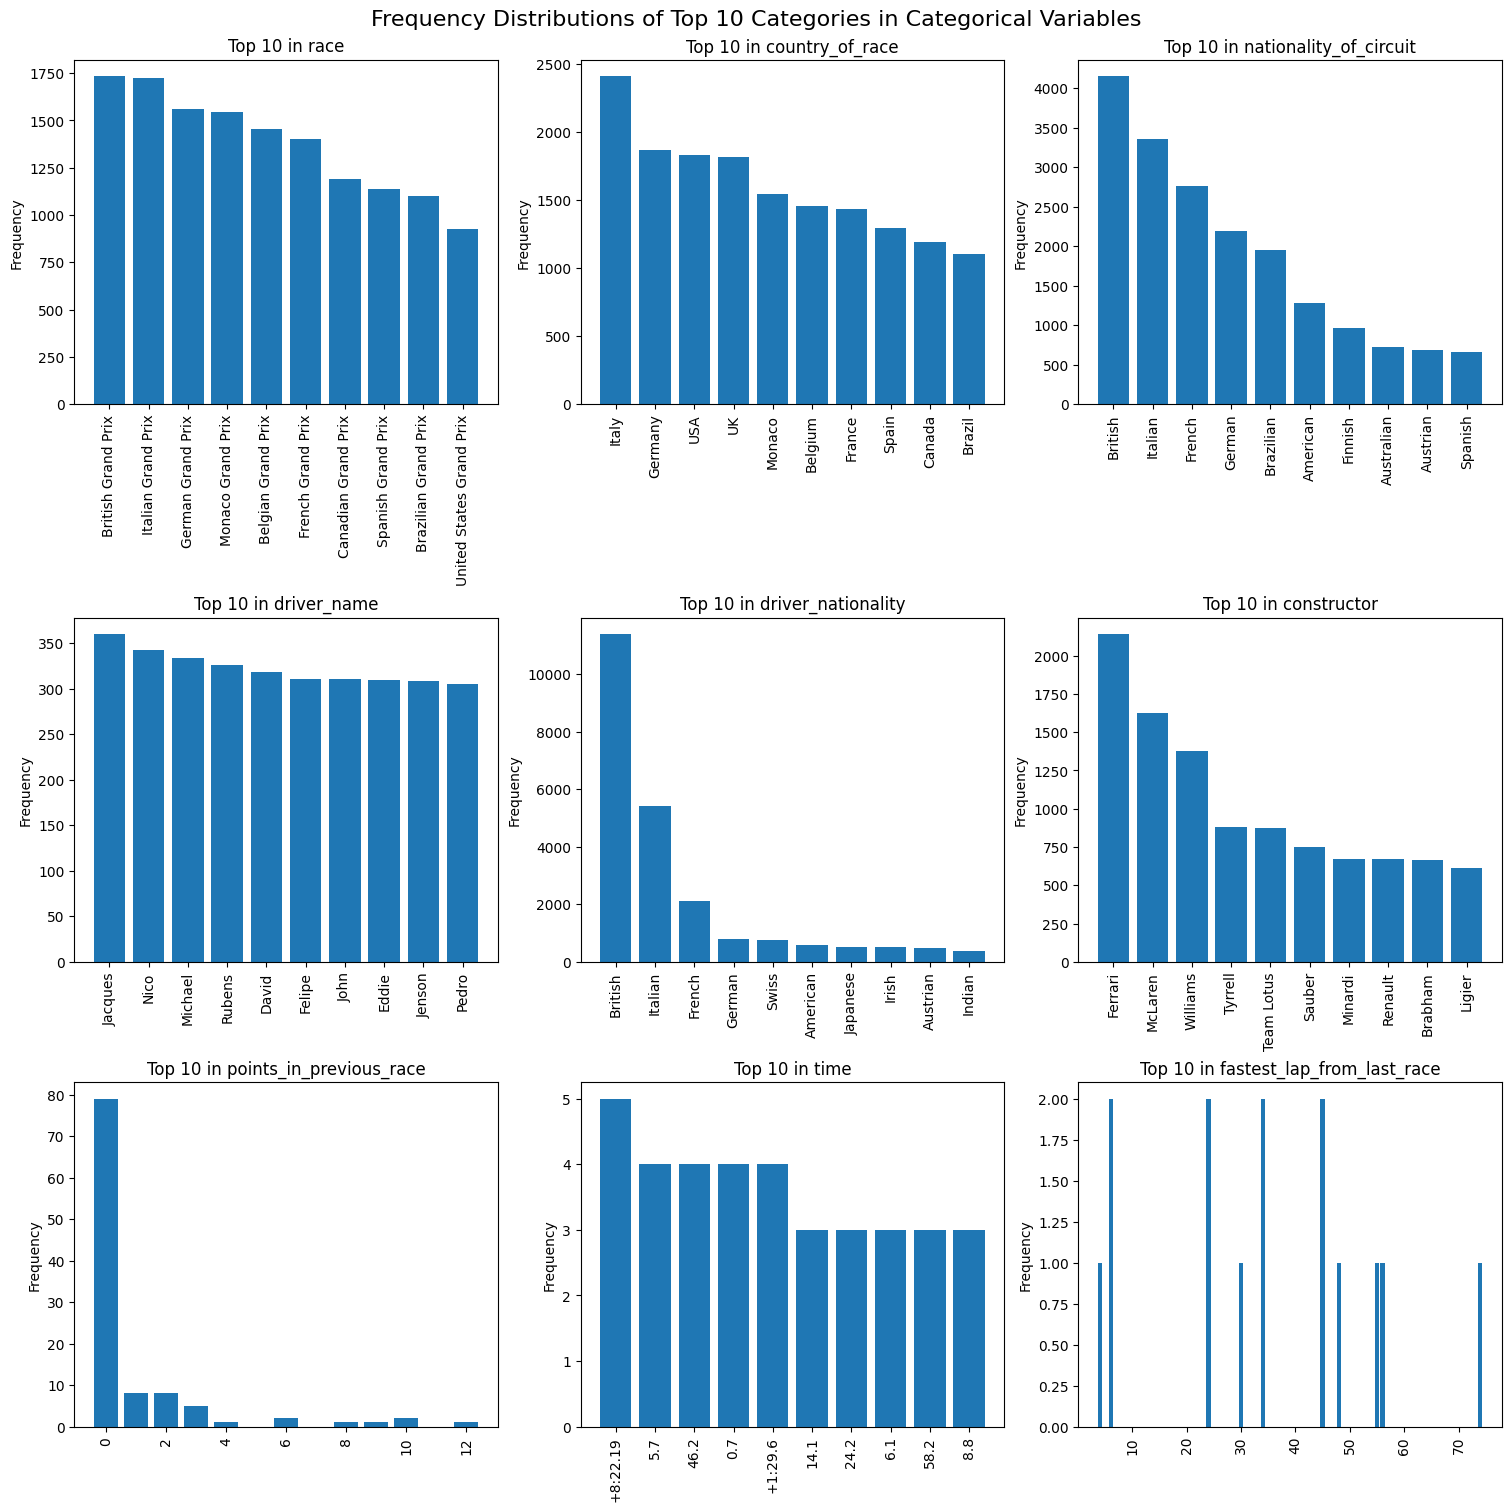

In [103]:
import matplotlib.pyplot as plt

# Identify categorical variables (assumed as object dtype here)
categorical_df = data_analysis_df.select_dtypes(include=['object']).columns

# Limit the number of categorical variables to the first 9 for a 3x3 subplot grid
categorical_df = categorical_df[:9]  # Select only the first 9 categorical variables

ncols = 3  # number of columns in your subplot grid
nrows = 3  # number of rows in your subplot grid (fixed at 3 for a 3x4 grid)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), constrained_layout=True)
fig.suptitle('Frequency Distributions of Top 10 Categories in Categorical Variables', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the top 10 categories for each of the first 9 categorical variables
for i, var in enumerate(categorical_df):
    # Generate frequency counts for the categorical variable
    counts = data_analysis_df[var].value_counts().head(10)

    # Plot the bar chart for the top 10 categories
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(f'Top 10 in {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Hide any unused subplots if the number of categorical variables is less than 9
for j in range(len(categorical_df), len(axes)):
    axes[j].set_visible(False)

plt.show()


# Used ChatGPT to get the top 10 for each category

- **Top 10 in race** :The bar chart displays a very uniform distribution of frequencies among the top 10 races, each with a frequency close to 600, indicating a similar level of occurrences or participation across these events. The Spanish Grand Prix has the highest frequency, marginally surpassing the others, while the Japanese Grand Prix has the lowest within the top 10, albeit not by a substantial margin.

**Top 10 in country** : The chart shows the most common race destinations are Great Britain, Spain and Italy.

- **Top 10 in nationality_of_circuit** The chart illustrates that Italian circuits have the highest frequency, surpassing 650, suggesting they are the most utilized or featured within this dataset. The rest of the nationalities of circuits show a relatively even distribution, all falling between approximately 400 to 600 frequency, indicating a broad international representation in the dataset.

- **Top 10 in driver_name** : The chart shows Fernando Alonso as the most frequently occurring driver in the top 10 category, indicating his prominence or consistent performance in the dataset. The relatively even distribution among the other top drivers suggests a competitive field with multiple individuals frequently appearing in the dataset.

- **Top 10 in Nationality** : The chart illustrates that German and British nationalities are the most prevalent in the dataset, suggesting a significant representation in the racing domain, which may reflect a robust motorsports culture or successful driver development programs in these countries. The subsequent decline in frequency for other nationalities such as Brazilian, Finnish, and French indicates a less dominant, yet still notable, presence in the sport.

- **Top 10 in constructor** : The bar chart shows the frequency of occurrences for the top 10 constructors, with McLaren having the highest frequency, surpassing 1000. Williams, Ferrari, and Sauber follow, indicating their significant presence, but each with a notably lower frequency than McLaren, suggesting McLaren's dominance or higher activity within the context measured.

- **Top 10 in engine manufacturer** : The chart indicates that Mercedes is the most frequently listed engine manufacturer, which could suggest their dominance or preferred choice in engine supply within the dataset's context. Ferrari follows as the second most common and Renault in third, showing competitive presences, but with a slightly lower frequency compared to Mercedes, highlighting a potential gap in engine supplier representation.

- **Top 10 in constructor nationality** : The chart presents the frequencies of the top 10 constructor nationalities, showing a clear dominance of British constructors with a frequency over 3000. Italian constructors come in second, but with less than half the frequency of the British, highlighting a significant concentration of constructors' nationalities being British or Italian in each row of data.

- **Top 10 in points_in_previous_race** The chart indicates a high frequency of occurrences where drivers scored zero points in the previous race, suggesting that not scoring in a race is the most common outcome. The sharp drop-off in frequency for scoring any points highlights that achieving points in races is less common and may reflect the competitive nature of the sport or the scoring system's structure.



#### **Univariate Analysis - Numeric variables**

Let's repeat the process we did above with the numeric variables:

In [104]:
data_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23777 entries, 19782 to 6996
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resultId                          23777 non-null  int64  
 1   raceId                            23777 non-null  int64  
 2   year                              23777 non-null  int64  
 3   race                              23777 non-null  object 
 4   country_of_race                   23777 non-null  object 
 5   nationality_of_circuit            23777 non-null  object 
 6   driverId                          23777 non-null  int64  
 7   number                            23771 non-null  float64
 8   driver_name                       23777 non-null  object 
 9   F2_champion                       23777 non-null  int64  
 10  Former_F1_World_Champion          23777 non-null  int64  
 11  driver_nationality                23777 non-null  object 
 12  home_r

In [105]:
# Get only the numeric columns
numeric_df = data_analysis_df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,resultId,raceId,year,driverId,number,F2_champion,Former_F1_World_Champion,grid,positionOrder,points,laps,laps_completed_in_previous_races,milliseconds,fastestLap,average_time_lost_in_pits,statusId,race_win
19782,19783,822,1952,750,126.0,1,0,19,16,0.0,5,NaN,NaN,NaN,NaN,5,0
19430,19431,808,1953,698,24.0,1,0,13,16,0.0,20,NaN,NaN,NaN,NaN,36,0
15,16,18,2008,16,20.0,1,0,22,16,0.0,8,NaN,NaN,8.0,NaN,9,0
41,42,19,2008,16,20.0,1,0,20,20,0.0,5,8.0,NaN,3.0,NaN,9,0
62,63,20,2008,16,20.0,1,0,20,19,0.0,56,5.0,NaN,55.0,NaN,12,0


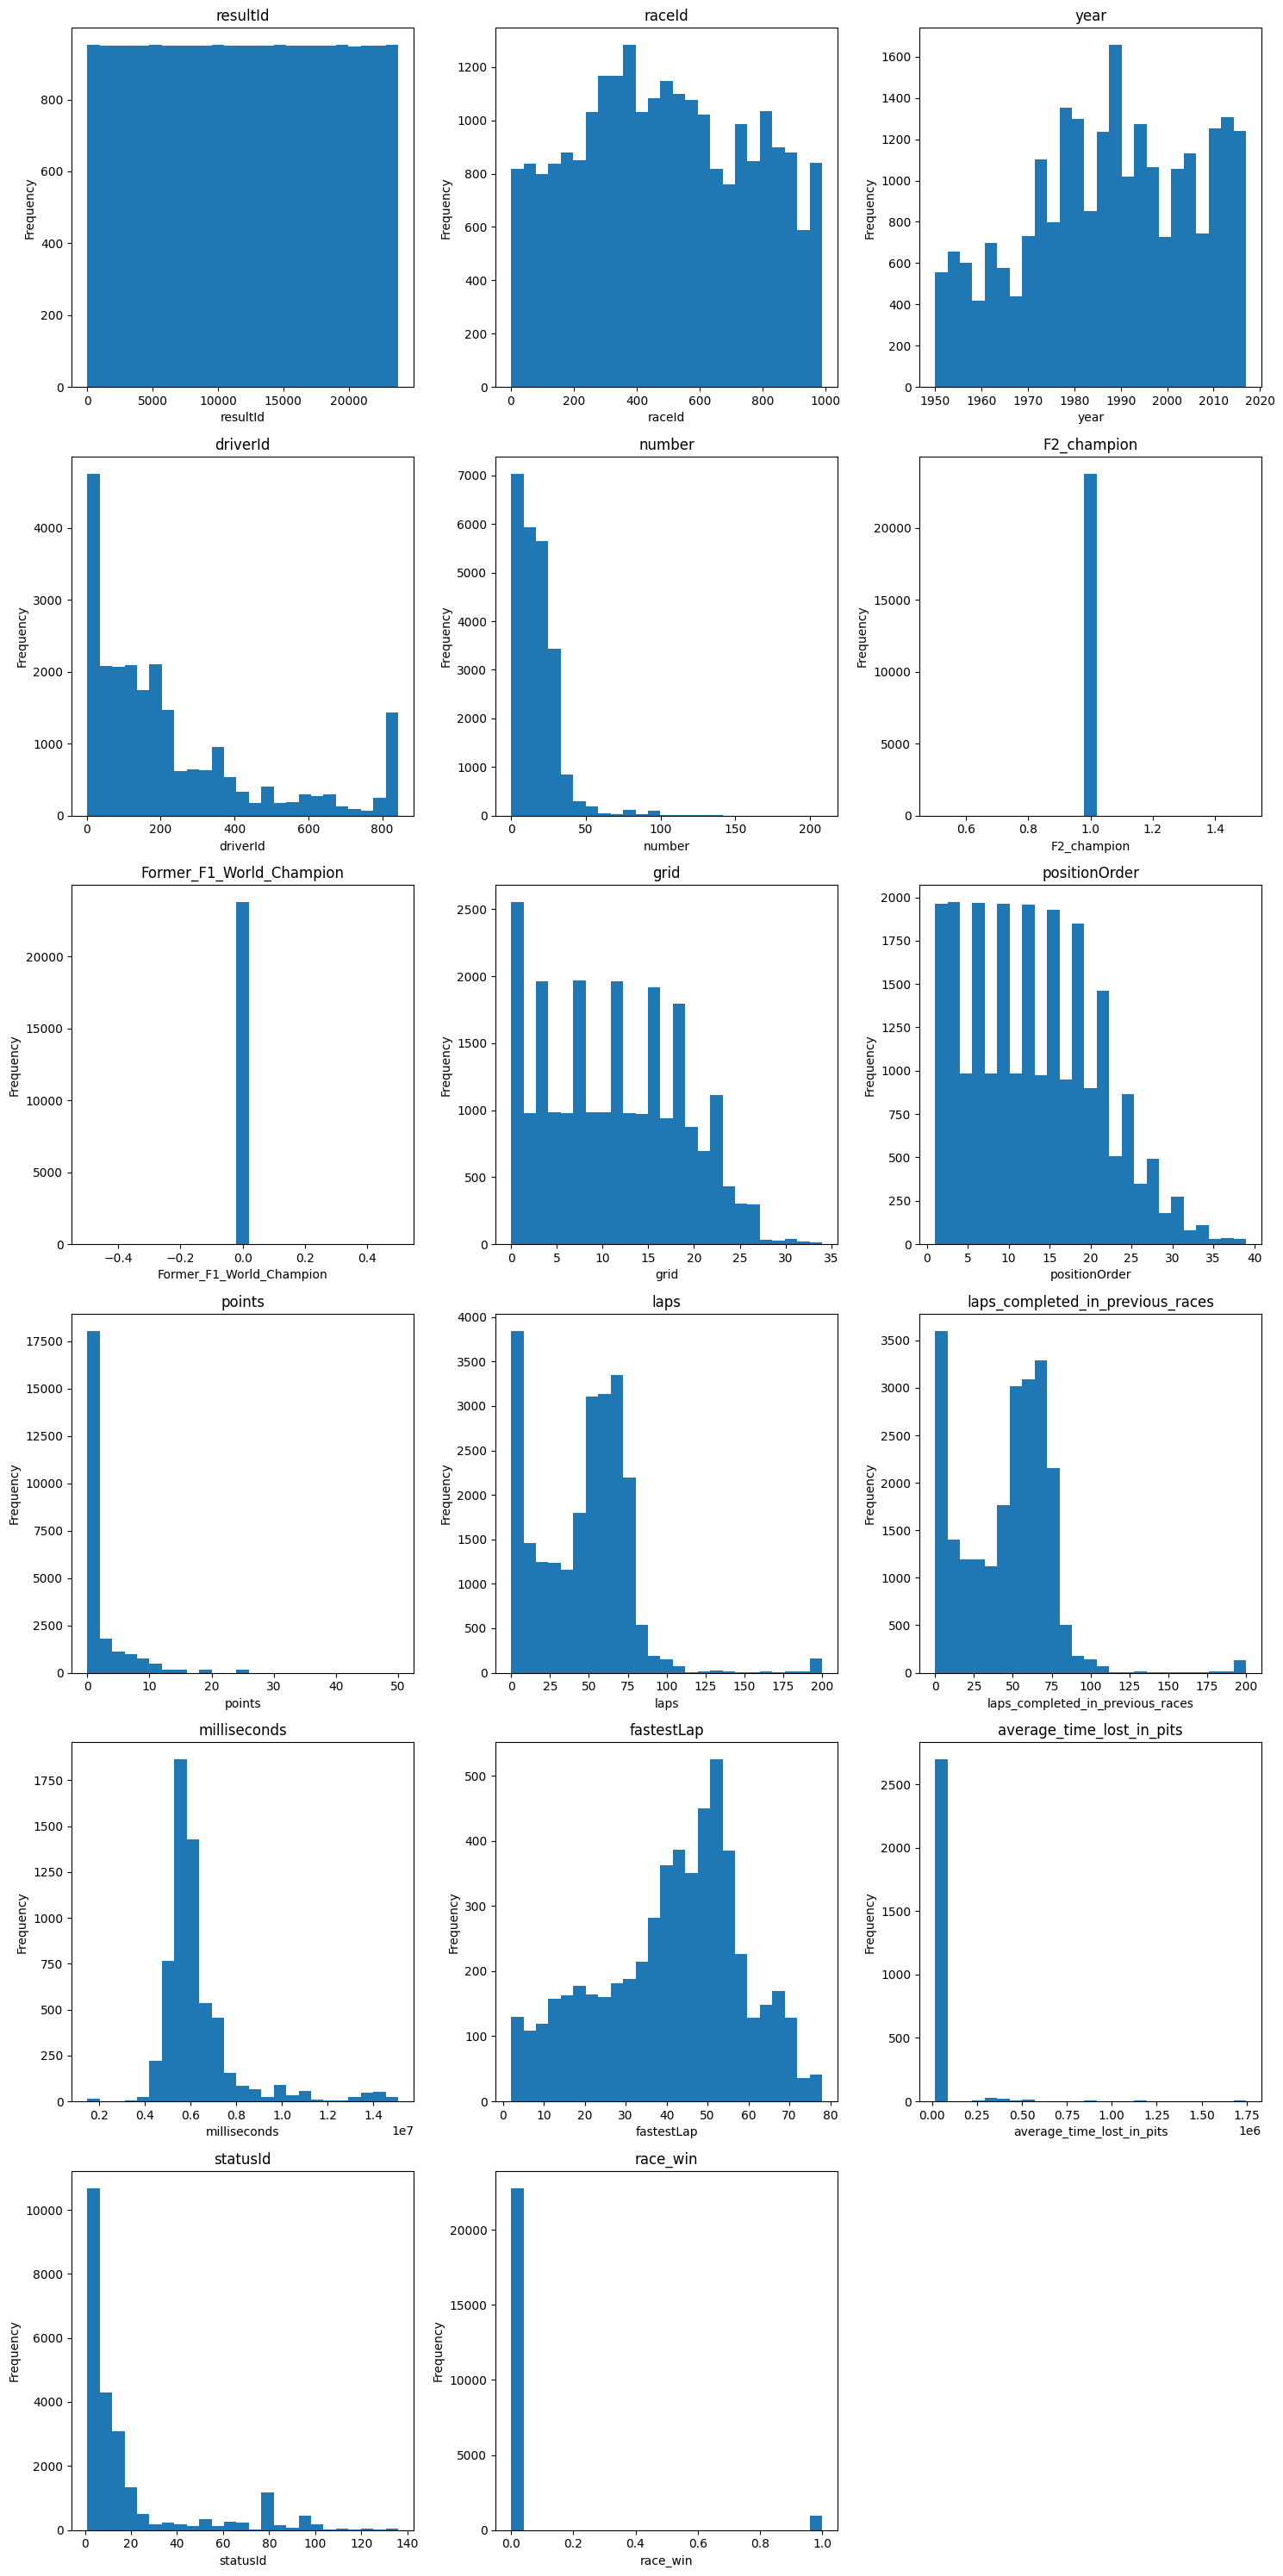

In [106]:
num_columns = len(numeric_df.columns)

ncols = 3
nrows = (num_columns + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
axes = axes.flatten()

for i in range(min(num_columns, nrows*ncols)):
    column = numeric_df.columns[i]
    # Check if there are any non-NaN values and the data is numeric
    if numeric_df[column].notna().any() and np.issubdtype(numeric_df[column].dtype, np.number):
        axes[i].hist(numeric_df[column].dropna(), bins=25)
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, 'Data not available or non-numeric',
                     horizontalalignment='center',
                     verticalalignment='center',
                     transform=axes[i].transAxes)
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_visible(False)  # Optionally, make the entire subplot invisible

# Hide any unused subplots if the number of columns is not a multiple of ncols
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here are the insights from each histogram presented in the subplot for the F1 race win prediction data science project:

1. **Index**: The distribution seems relatively uniform, indicating that the dataset entries are spread evenly across the index range.
   
2. **resultId**: There are two peaks in the dataset, which may indicate groups or clusters of results that could be explored for underlying patterns related to race wins.
   
3. **raceId**: Similar to resultId, the raceId histogram shows several peaks. This might suggest that certain races (identified by raceId) have more entries, potentially because of multiple races per year or more detailed data collection in specific events.

4. **year**: The data spans across many years, with noticeable variations in frequency. The peaks might correspond to years with more races held or better data recording practices.

5. **driverId**: There's a high frequency for certain driverIds, which could be indicative of drivers who have participated in many races, hence they may have a higher chance of winning due to experience.

6. **number**: This is likely the racing number of the drivers. The distribution shows that certain numbers are far more common, which might be historical or due to the popularity of specific numbers among racers.

7. **F2_champion**: The data is heavily skewed towards non-champions, with very few F2 champions in the dataset. This could indicate that F2 champions are less common in F1 racing, or their presence does not significantly influence race wins.

8. **Former_F1_World_Champion**: Similar to F2_champions, there are significantly fewer former F1 World Champions than non-champions. This could be an important feature, as being a former champion might correlate with the likelihood of winning races.

9. **home_race**: The histogram shows that most races are not home races for drivers, with a small number of instances where drivers are racing in their home country.

10. **constructorId**: Similar to driverId, the frequency of certain constructorIds suggests that some teams participate more frequently in races, potentially influencing the win rate.

11. **number.1**: This appears to be the same as the 'number' distribution and could be a duplicate column that might need to be removed from the dataset to avoid multicollinearity.

12. **starting_grid_position**: A large number of entries are towards the lower grid positions, indicating that most drivers do not start from pole positions. The distribution of this feature can be crucial, as starting positions can significantly affect race outcomes.

13. **positionOrder**: There's a high frequency of higher position orders, showing that finishing in the top positions (i.e., 1st, 2nd, 3rd) is less common - a key insight for predicting race wins.

14. **points**: Most entries scored low points, with a rapid drop-off as points increase, indicating that higher point scores are rarer, which aligns with the lower frequency of race wins.

15. **laps**: The histogram shows that there is a high frequency of races with a higher number of laps completed, suggesting that most drivers finish the race with many laps, which could be indicative of a higher chance of winning.

Each histogram provides insights that could be leveraged to understand factors that influence race wins in F1. Some variables like 'driverId' and 'constructorId' may represent experience and resources, while variables like 'starting_grid_position' and 'positionOrder' are direct indicators of race performance. Variables with a high imbalance (like 'F2_champion' and 'Former_F1_World_Champion') could significantly impact the model if the minority class has a strong relation to the outcome (race wins).

### **Bivariate Analysis - with respect to `positionOrder` variable.**
Look at the registered variable of interest. We will repeat our analysis over the categorical variables after dividing by the positionOrder column:

To visualise this, I will focus on the top 10 for each category

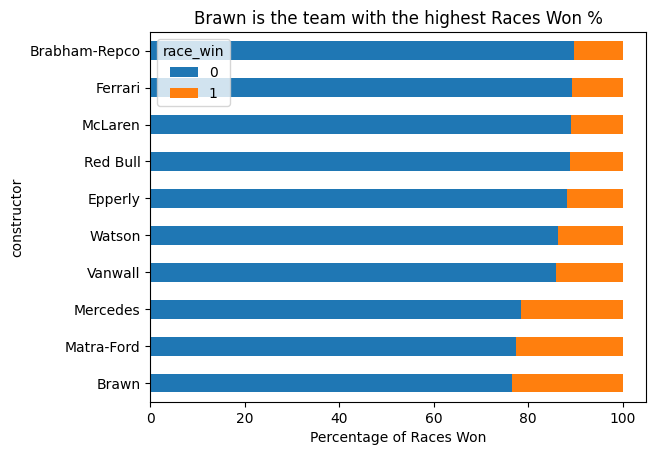

In [107]:
# First, calculate the counts of wins and losses for each constructor
constructor_counts = data_analysis_df.groupby(['constructor'])['race_win'].value_counts().unstack(fill_value=0)

# Next, get the total number of races for each constructor
total_races = data_analysis_df.groupby('constructor')['constructor'].count()

# Calculate the percentage of wins for each constructor
pct_team_df = (constructor_counts.div(total_races, axis=0) * 100).sort_values(by=1, ascending=False)

# Now, plot only the top 10 constructors
top_constructors = pct_team_df.nlargest(10, 1)  # Get the top 10 constructors with the most wins
top_constructors.plot(kind='barh', stacked=True, mark_right=True)
plt.title('Brawn is the team with the highest Races Won %')
plt.xlabel('Percentage of Races Won')

# Display the plot
plt.show()


We will now do this for all the rest of the useful categorical columns

<ipython-input-108-a22bfd70ec6d>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_group_counts = data_analysis_df.groupby([column, 'race_win'], sort=False).size().unstack('race_win').fillna(0)
<ipython-input-108-a22bfd70ec6d>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_group_counts = data_analysis_df.groupby([column, 'race_win'], sort=False).size().unstack('race_win').fillna(0)
<ipython-input-108-a22bfd70ec6d>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

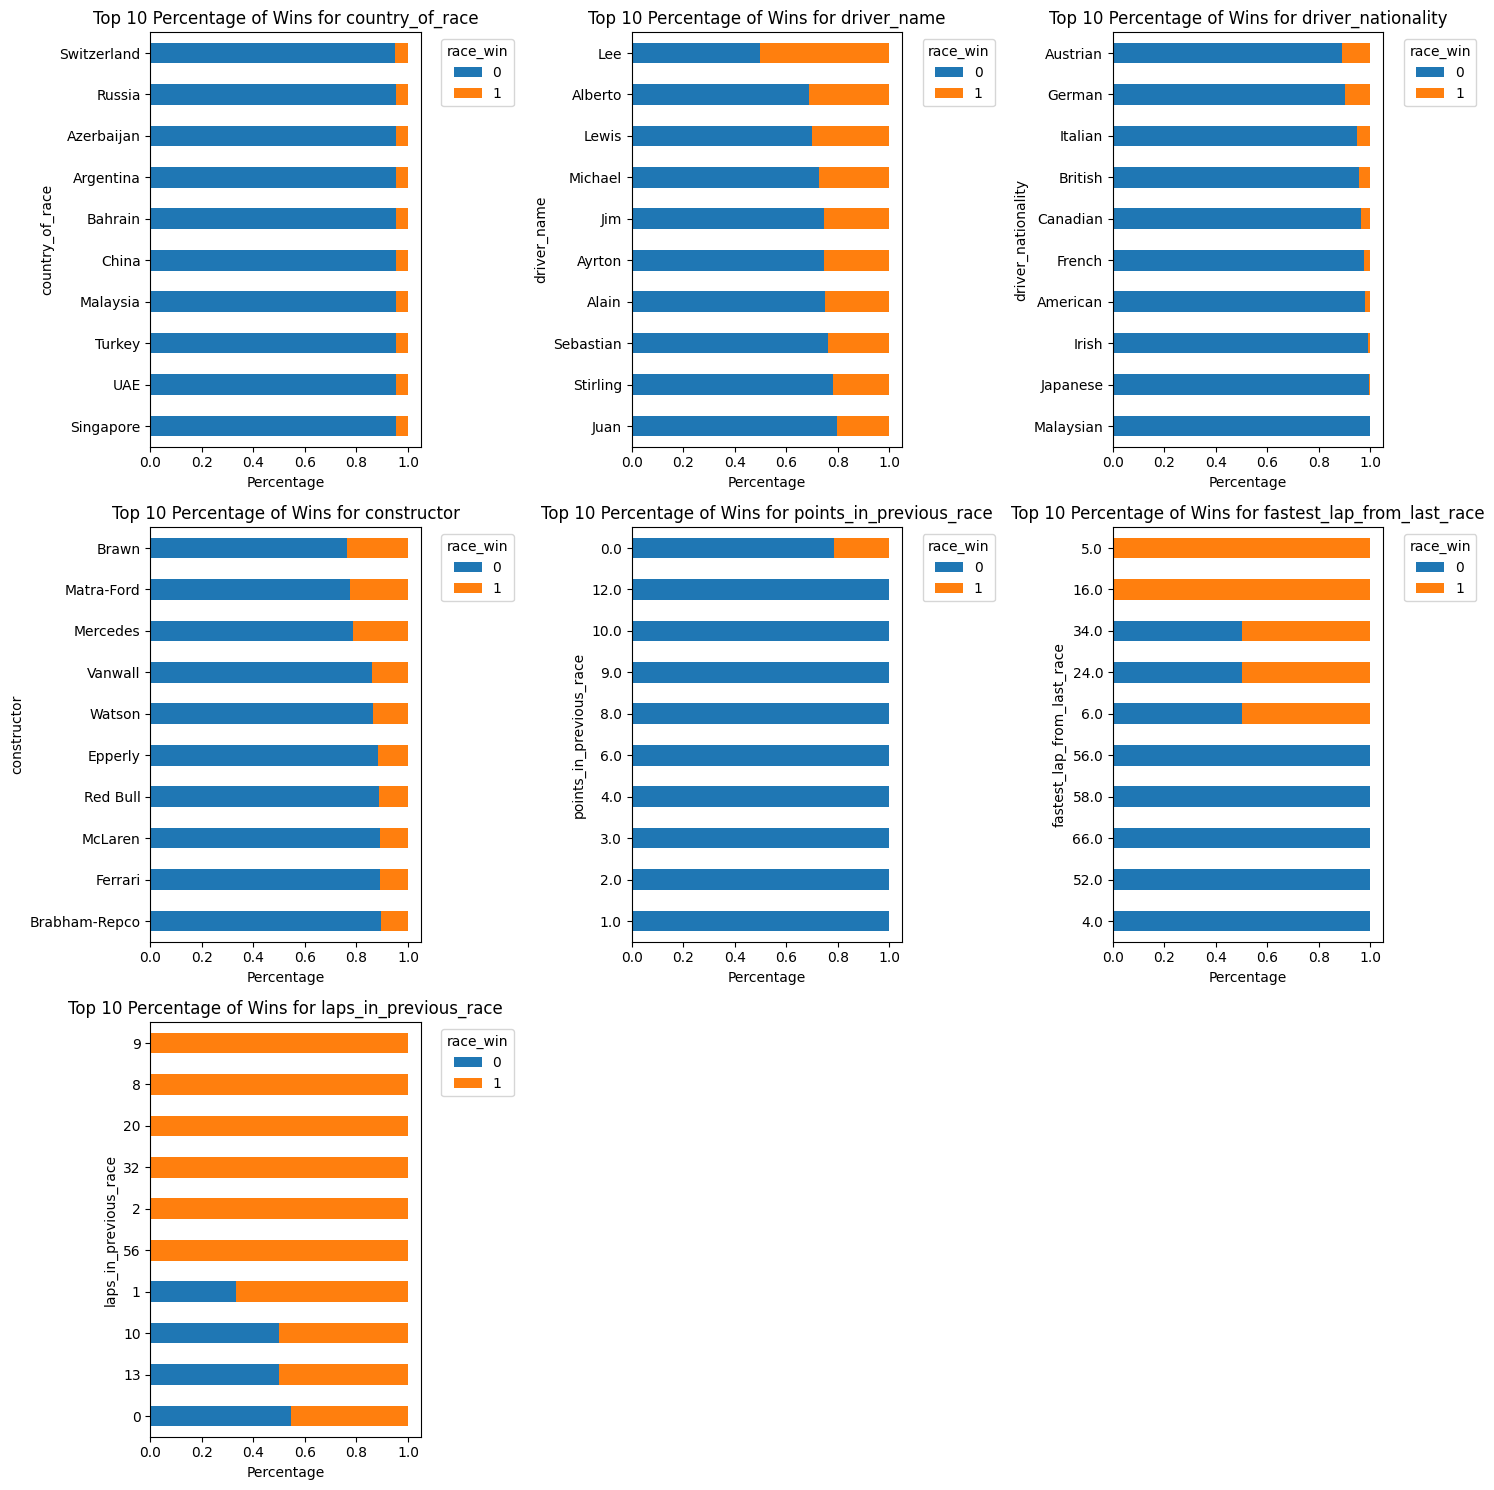

In [108]:
# Ensure 'race_win' column is of type 'category'.
data_analysis_df['race_win'] = data_analysis_df['race_win'].astype('category')

# Extract the column names of categorical variables and exclude specific columns
exclude_columns = ["race", "country", "nationality_of_circuit", "time", "milliseconds", "fastestLap_ms", "status"]
categorical_columns = data_analysis_df.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Calculate the required number of rows for 3 columns based on the number of categorical variables.
num_variables = len(categorical_columns) - 1  # Adjust for excluding 'race_win'
num_rows = int(np.ceil(num_variables / 3))

# Create a figure with subplots in a 3-column layout
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten the array to make it easier to iterate over

for i, column in enumerate(categorical_columns[:-1]):  # Adjust the loop to exclude 'race_win'
    # Group by the current column and 'race_win', then calculate the counts
    category_group_counts = data_analysis_df.groupby([column, 'race_win'], sort=False).size().unstack('race_win').fillna(0)

    # Calculate totals for each category and the percentage of wins
    category_totals = category_group_counts.sum(axis=1)
    pct_win_cat_df = category_group_counts.div(category_totals, axis=0)

    # Sort and select top categories by winning percentage
    top_categories = pct_win_cat_df[1].sort_values(ascending=False).head(10).index
    pct_win_cat_df = pct_win_cat_df.loc[top_categories]

    # Plot into the subplot
    pct_win_cat_df.sort_values(by=1, ascending=True).plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axs[i])
    axs[i].set_title(f'Top 10 Percentage of Wins for {column}')
    axs[i].set_xlabel('Percentage')
    axs[i].legend(title='race_win', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused axes in the subplot grid
for ax in axs[len(categorical_columns[:-1]):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The charts illustrate the top 10 categories in various attributes related to racing data, showcasing the percentage of wins versus losses.

1. In the **"Points in Previous Race"** chart, there is an interesting stand out value here, that if a racer got 12.5 points in the previous race, they have a 100% win % in the following race. I will want to investigate this in more detail.
2. The **"Constructor Nationality"** chart shows German and Austrian constructors have the highest win percentages, indicating their strong performance.
3. For **"Engine Manufacturer"** Red Bull and Mercedes are leading, reflecting their dominance in the engine manufacturing sector of races.
4. The **"Constructor"** chart indicates that Brawn has a significantly higher win percentage compared to others like Mercedes and Red Bull, highlighting a period of dominance or success.
5. **Nationality-wise**, Dutch and British drivers have the highest win percentages, suggesting a strong presence of successful drivers from these countries.
6. Among **drivers**, Lewis Hamilton and Michael Schumacher show the highest win percentages, emphasizing their iconic status in racing.
7. The **"Nationality of Circuit"** nothing is really shown here, as there will always be a winnner at each race
8. The **"Country"** nothing is really shown here, as there will always be a winnner at each race
9. With **"Race"** nothing is really shown here, as there will always be a winnner at each race
10. For `fastest_lap_from_last_lap`, `time`, and `milliseconds`, there are a number of attributes that lead towards 100% race wins. These will need to be digged into for further analysis later.
11. **Status** shows that if you finish the race, you are more likely to win, which makes sense vs not finishing

Each chart offers insights into the factors contributing to race wins across different categories, such as the influence of nationality, individual driver performance, constructor efficiency, and the significance of the race location or circuit.

#### Bivariate Analysis - Numeric Features

In [109]:
# Identifying continuous numerical columns
continuous_cols = ['year', 'starting_grid_position', 'laps', 'number_of_pit_stops', 'average_time_lost_in_pits']

# Check for missing columns and filter out those that do not exist in the DataFrame
existing_continuous_cols = [col for col in continuous_cols if col in data_analysis_df.columns]

# Print missing columns if any
missing_cols = set(continuous_cols) - set(existing_continuous_cols)
if missing_cols:
    print(f"Warning: The following columns are missing and will not be included: {missing_cols}")

# Creating a DataFrame with just the existing continuous numerical data
numeric_df = data_analysis_df[existing_continuous_cols]


In [110]:
# Check
numeric_df.head()

,year,laps,average_time_lost_in_pits
19782,1952,5,NaN
19430,1953,20,NaN
15,2008,8,NaN
41,2008,5,NaN
62,2008,56,NaN


<ipython-input-112-7be237e2a1b8>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='race_win', data=data_analysis_df, showfliers=False, palette=box_colors, ax=axs[i])


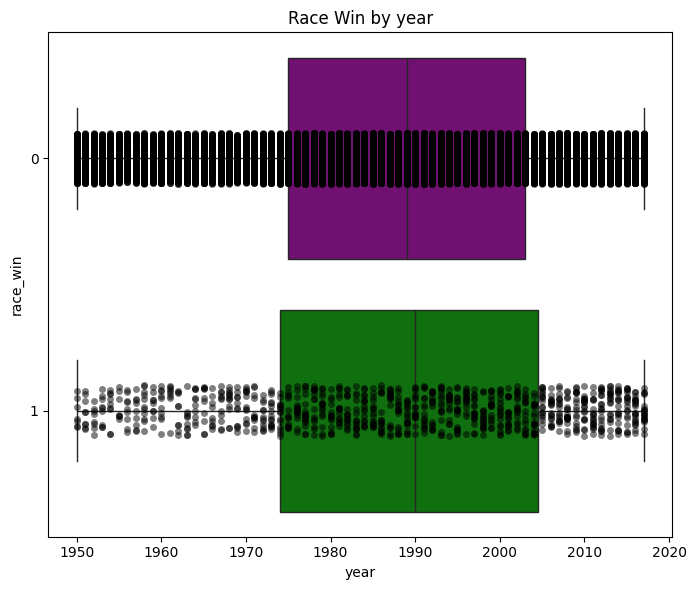

In [112]:
# # Determine the number of rows needed for the subplot grid, given there are 3 columns
# num_rows = int(np.ceil(len(numeric_df.columns[:-2]) / 3))

# # Create a figure and a grid of subplots
# fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 6))  # Adjust figsize as needed
# axs = axs.flatten()  # Flatten the array of axes to easily iterate over it

# # Iterate over each column in numeric_df to create a plot
# for i, col in enumerate(numeric_df.columns[:-2]):  # Exclude the last two columns directly
#     # Create the boxplot in the ith subplot
#     sns.boxplot(x=col, y='race_win', data=data_analysis_df, showfliers=False, palette="Set3", ax=axs[i])

#     # Overlay with a stripplot to show data density
#     sns.stripplot(x=col, y='race_win', data=data_analysis_df, color='black', alpha=0.5, jitter=True, ax=axs[i])

#     axs[i].set_title(f'Race Win by {col}')

# # If the total number of plots is not a multiple of 3, hide the unused subplots
# for j in range(i + 1, len(axs)):
#     axs[j].set_visible(False)

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows needed for the subplot grid, given there are 3 columns
num_rows = int(np.ceil(len(numeric_df.columns[:-2]) / 3))

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 6))  # Adjust figsize as needed
axs = axs.flatten()  # Flatten the array of axes to easily iterate over it

# Define custom colors for the boxplot
box_colors = ['purple', 'green']

# Iterate over each column in numeric_df to create a plot
for i, col in enumerate(numeric_df.columns[:-2]):  # Exclude the last two columns directly
    # Create the boxplot in the ith subplot with custom colors
    sns.boxplot(x=col, y='race_win', data=data_analysis_df, showfliers=False, palette=box_colors, ax=axs[i])

    # Overlay with a stripplot to show data density
    sns.stripplot(x=col, y='race_win', data=data_analysis_df, color='black', alpha=0.5, jitter=True, ax=axs[i])

    axs[i].set_title(f'Race Win by {col}')

# If the total number of plots is not a multiple of 3, hide the unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

1. **Year vs. Race Win**: The box plot depicts the distribution of Formula 1 race outcomes over time, highlighting the frequency of wins across different years. Wins are event split out during the years.

2. **race_win by starting_grid_position**: This chart illustrates the influence of starting position on race outcomes. A higher concentration of wins at lower starting positions (closer to pole position) looks to show the importance of qualifying performance in race success.

3. **race_win by laps**: It looks like wins are concentrated around higher lap counts, which implies that the ability to complete more laps is associated with higher chances of winning, possibly indicating reliability and consistency as key factors.



# 5

## Conclusion

### Insights
State the insights/outcomes of your project or notebook.

#### Univariate Analysis Insights

**Categorical Data** The univariate analysis of the dataset reveals key insights into the Formula 1 racing domain. Categorical analysis showed;
- **McLaren**, **Williams** and **Ferrari** were the most prominent constructors in the dataset
- **German** and **British** were the most frequent driver nationalities, suggesting robust motorsports cultures in these countries.
- **Mercedes** emerged as the most common engine manufacturer in the dataset
- **British constructors** vastly outnumbered others, indicating possible regional biases in the sport's history or dataset compilation.
- **Fernando Alonso's** frequent appearance underlines his prominence in the sport
- There is a high occurrence of **zero points** in previous races was observed, which points to 0 points being the most frequent output for a Formula 1 driver (per race)

**Numerical Data**
Numeric variable analysis depicted even distribution across the index, hinting at a well-spread dataset.
- The appearance of peaks in 'resultId' and 'raceId' may signal clusters worth further investigation.
- Variation in the 'year' frequency could correspond to different numbers of races or changes in data recording over time.
- High frequencies in specific 'driverId' and 'constructorId' values suggest the persistence of certain drivers and teams.
- A skewed distribution in 'F2_champion' and 'Former_F1_World_Champion' columns indicates their rarity.
- Most races aren't home races for drivers, which could influence race dynamics.
- 'Starting_grid_position' shows most drivers do not begin in pole positions (1-3), which makes sense as only 3 drivers can occupy those slots per race.
- The 'positionOrder' and 'points' distributions affirm that top positions and high scores are uncommon, reflecting the competitive nature of scoring in Formula 1.
- Lastly, the 'laps' histogram suggests a tendency for drivers to complete many laps, potentially correlating with success in races.

#### Bivariate Analysis Insights

**Categorical Data** The bivariate analysis of categorical variables in the racing data provides valuable insights into the relationships between different attributes and race outcomes, focussing on race wins:
- The analysis of `Points_in_Previous_Race` does not show a discernible trend correlating previous points with an increased chance of winning, suggesting that a driver's performance in the previous race does not strongly predict future wins.
- The `Constructor Nationality` chart reveals that **German** and **Austrian** teams have the highest win percentages, hinting at these countries' effectiveness in constructing competitive racing teams.
- When examining `Engine Manufacturer`, **Red Bull** and **Mercedes** stand out, indicating their prowess and potential competitive advantage in providing race-winning engines.
- The `Constructor` chart uncovers that **Brawn GP** enjoys a notable win rate, which may indicate a historical period of dominance or particular success during a certain timeframe.
- With regards to `driver nationalities`, **Dutch** and **British** competitors exhibit the highest win percentages, possibly reflecting the strength of their racing heritage or driver development programs.
- Focusing on `individual drivers`, the chart shows **Lewis Hamilton** and **Michael Schumacher** with remarkable win percentages, underscoring their exceptional achievements and legendary status in Formula 1.
- The `Nationality of Circuit`, `Country`, and `Race` charts do not provide significant insights since there is inherently a winner for each race, making these variables less informative in this context.

#### Numerical Analysis Insights

**Numerical Data** Based on the analysis of various attributes and their relationship with race wins, we can summarize the findings as follows:
-  `Year` looks evenly distributed and not much influencing power on `race_win`
- The examination of `race_win` by `starting_grid_position` and `race_win` by `laps` provides key insights:
1. A higher concentration of wins at lower starting positions suggests the significant impact of qualifying performance on race success.
2. Wins are concentrated around higher lap counts, indicating that reliability and consistency are critical factors in winning races.

### Insights

Based on the insights from the exploratory data analysis (EDA), here are my insights and next steps for the Formula 1 race win predictor project:

1. **Feature Engineering**: Based on the insights gathered, I might look at new features that may help in predicting race wins. For instance, creating a feature that encapsulates a team's or driver's historical success rate, or how well teams have adapted to major F1 regulation changes or how well the team developed their previous year`s car, may be helpful for predicting race wins.

2. **Deeper Dive into Specific Variables**: For variables like `constructor nationality` and `engine manufacturer`, which show correlations with win rates, I may consider a deeper analysis to understand the causative factors behind these trends.

3. **Correlation Analysis**: Perform a correlation analysis to see how numerical variables like `starting_grid_position`, `points`, and `laps` correlate with race wins. This may help in selecting features for predictive modeling.

4. **Predictive Model Development**: Use the insights from univariate and bivariate analysis to inform the selection of features for a predictive model.

5. **Validation Strategy**: Plan a robust validation strategy, to ensure that your predictive model performs well on unseen data and avoids overfitting.

6. **Integration of External Data**: Consider integrating additional data sources that may have predictive power, such as weather conditions, in-season development changes, or individual driver performance metrics during practice sessions.







### Next Steps

Here are the bullet points outlining the next steps for data preprocessing and building initial logistic regression models:

#### Data Preprocessing:
- **Handling Missing Data**: Impute or remove missing values based on the insights from EDA.
- **Removing Duplicate and Drop Redundant Columns** identify and eliminate duplicate rows to prevent skewing the model with repetitive information. Additionally, drop columns that do not contribute to the predictive power of the model or that duplicate information already captured by other features, reducing dimensionality and simplifying the model.
- **Data Cleaning**: Ensure data consistency by standardizing text and removing any irrelevant or redundant information.
- **Feature Selection**: Choose relevant features for the model based on EDA insights and correlation analysis.
- **Feature Engineering**: Create new features that could have predictive power, such as historical performance metrics.
- **Encoding Categorical Variables**: Use one-hot encoding or label encoding to convert categorical variables into a format that can be provided to the model.

#### Building Initial Logistic Regression Models:
- **Model Initialization**: Set up the initial logistic regression model with default parameters.
- **Training the Model**: Fit the logistic regression model to the training data.
- **Model Evaluation**: Assess the model's performance using appropriate metrics.
- **Interpreting Coefficients**: Analyze the model coefficients to understand the influence of each feature on race outcome predictions.
- **Iterative Refinement**: Refine the model iteratively by revisiting preprocessing steps and feature selection based on model evaluation results.
- **Model Validation**: Validate the final model on the testing set to ensure its predictive capability holds for new data.